In [52]:
from __future__ import print_function

import numpy as np
import scipy as sp
from numpy import cos, sin, log, exp, log10, absolute
from scipy.integrate import odeint
from numpy.polynomial import chebyshev as T
from numpy.polynomial import hermite_e as H
from spectral_tools import Decompose, ModalD, NodalD, Vandermonde
from edgedetect import ChebEdgeIII, Enhance, LocateEdges, MinMod
from mollification import PiecewiseMollify
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [2]:
N = 16
c2s, s2c = Vandermonde(N)
modalD = ModalD(c2s)
nodalD = NodalD(c2s, s2c)

In [4]:
chi = lambda x : 1.0 if (x >= -0.5 and x <= 0.5) else 0

a_n = Decompose(chi, c2s)
col_pts = np.hstack((-1.0, T.Chebyshev.basis(N-1).roots(), 1.0))
chi_col = np.frompyfunc(chi, 1, 1)(col_pts) 

In [108]:
# begin time evolution of the advection equation
x = np.linspace(-1.0, 1.0, 1001)
t = np.linspace(0, 10, 2000)
rho = np.empty((len(t), len(x)))
rho0 = np.array(chi_col, dtype='float64')
rho0[0] = rho0[-1]
c = 5.0

def d_dt(y, t):
    
    deriv = -np.dot(nodalD, c*y)
    
    return deriv
    

In [109]:
rho_c = odeint(drho_dt, rho0, t)
rho_c[:,0] = rho_c[:,-1]

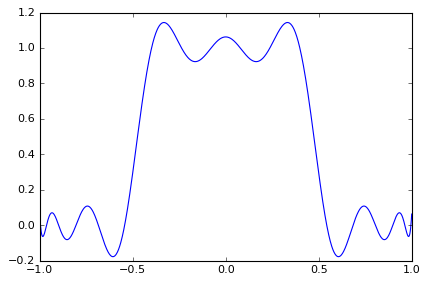

In [110]:
a_n2 = np.dot(c2s, rho_c[0,:])
test = T.chebval(x, a_n2)
plt.plot(x, test)

In [111]:
for idx, t_n in enumerate(t):
    a_nn = np.dot(c2s, rho_c[idx,:])
    rho[idx,:] = T.chebval(x, a_nn)

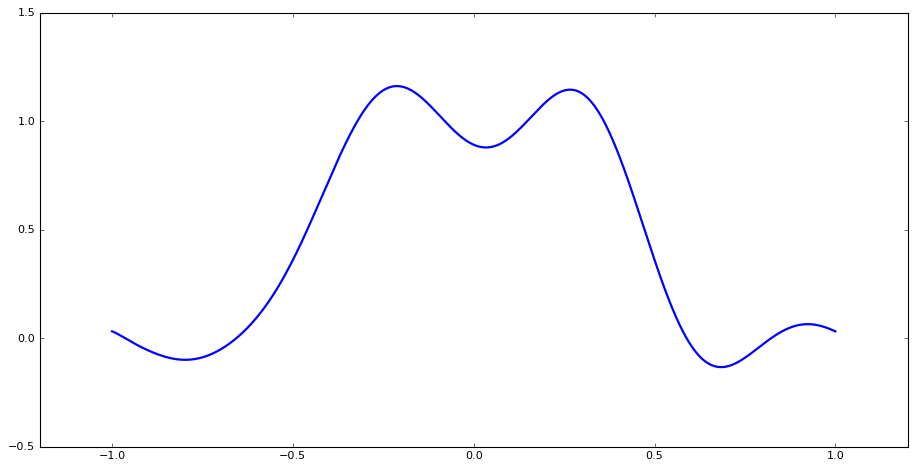

In [112]:
# animation time

fig = plt.figure(figsize=(14,7))
ax = plt.axes(xlim=(-1.2, 1.2), ylim=(-0.5, 1.5))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    y = rho[i,:]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=50, blit=True)

HTML(anim.to_html5_video())
